In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
cleaned_df = df.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)

In [7]:
cleaned_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cleaned_df['Sex'] = le.fit_transform(cleaned_df['Sex'])

In [9]:
cleaned_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [11]:
mn = int(np.mean(cleaned_df.iloc[:, 3]))

In [12]:
cleaned_df.fillna(value=mn, inplace=True)

In [13]:
cleaned_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:
cleaned_df.info()
cleaned_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.560236,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.005010,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data = cleaned_df.values

In [16]:
data

array([[ 0.    ,  3.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    ,  1.    , ...,  0.    ,  0.    ,  7.75  ]])

In [17]:
X = cleaned_df.iloc[:, 1:]

In [18]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,29.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


### define entropy and IG

In [19]:
# H(s) = sigma[-plogp]
def entropy(col):
    counts = np.unique(col, return_counts=True)
    N = float(col.shape[0])
    
    entropy = 0.0
    for ix in counts[1]:
        p = ix / N
        entropy += -p * np.log2(p)
    return entropy

In [20]:
def divide_data(dfx, fkey, fval):
    xleft = pd.DataFrame([], columns=dfx.columns)
    xright = pd.DataFrame([], columns=dfx.columns)

    for ix in range(dfx.shape[0]):
        val = dfx[fkey].loc[ix]
        # print(val)
        if val > fval:
            xright = pd.concat([xright, dfx.loc[ix].to_frame().T], ignore_index=True)
        else:
            xleft = pd.concat([xleft, dfx.loc[ix].to_frame().T], ignore_index=True)

    return xleft, xright

In [21]:
xleft, xright = divide_data(cleaned_df[:10], 'Age', 25)
xleft, xright

(   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
 0       0.0     3.0  1.0  22.0    1.0    0.0   7.2500
 1       0.0     3.0  1.0   2.0    3.0    1.0  21.0750
 2       1.0     2.0  0.0  14.0    1.0    0.0  30.0708,
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare
 0       1.0     1.0  0.0  38.0    1.0    0.0  71.2833
 1       1.0     3.0  0.0  26.0    0.0    0.0   7.9250
 2       1.0     1.0  0.0  35.0    1.0    0.0  53.1000
 3       0.0     3.0  1.0  35.0    0.0    0.0   8.0500
 4       0.0     3.0  1.0  29.0    0.0    0.0   8.4583
 5       0.0     1.0  1.0  54.0    0.0    0.0  51.8625
 6       1.0     3.0  0.0  27.0    0.0    2.0  11.1333)

In [22]:
# IG(s, Attribute) = H(S) - sigma(mod(Sv)/mod(S) * H(Sv))
def InformationGain(X, fkey, fval):
    left, right = divide_data(X, fkey, fval)

    l = left.shape[0] / X.shape[0]
    r = right.shape[0] / X.shape[0]

    ig = entropy(cleaned_df.Survived) - (l * entropy(left.Survived) + r * entropy(right.Survived))
    return ig

In [23]:
for c in X.columns:
    print(c)
    ig = InformationGain(cleaned_df, c, cleaned_df[c].mean())
    print(ig)
    

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [24]:
class DecisionTree:

    def __init__(self, depth=0.0, max_depth=5.0):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.depth = depth
        self.max_depth = max_depth
        self.target = None

    def divide_data(self, dfx, fkey, fval):
        xleft = pd.DataFrame([], columns=dfx.columns)
        xright = pd.DataFrame([], columns=dfx.columns)
    
        for ix in range(dfx.shape[0]):
            val = dfx[fkey].loc[ix]
            if val > fval:
                xright = pd.concat([xright, dfx.loc[ix].to_frame().T], ignore_index=True)
            else:
                xleft = pd.concat([xleft, dfx.loc[ix].to_frame().T], ignore_index=True)
    
        return xleft, xright
    
    def train(self, X_train):
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        info_gains = []
        for c in features:
            ig = InformationGain(X_train, c, X_train[c].mean())
            info_gains.append(ig)
        
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()

        # print("splitting according to, ", self.fkey)
        # split data
        data_left, data_right = divide_data(X_train, self.fkey, self.fval)
        
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = 1
            else: 
                self.target = 0
            return

        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = 1
            else: 
                self.target = 0
            return

        self.left = DecisionTree(depth=self.depth + 1, max_depth=self.max_depth)
        self.left.train(data_left)
        self.right = DecisionTree(depth=self.depth + 1, max_depth=self.max_depth)
        self.right.train(data_right)

        if X_train.Survived.mean() >= 0.5:
            self.target = 1
        else: 
            self.target = 0
        return

    def predict(self, test):
        if test[self.fkey] > fval:
            if self.right is None:
                return self.target
            else:
                return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            else:
                return self.left.predict(test)

In [25]:
d = DecisionTree()
d.train(cleaned_df)

In [26]:
df = pd.read_csv('test.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
testx = df.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)

In [28]:
le = LabelEncoder()
testx['Sex'] = le.fit_transform(testx['Sex'])

In [29]:
testx

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,NaN,0,0,8.0500


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
sktree = DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [32]:
Y = cleaned_df.Survived

In [33]:
sktree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [34]:
predY = sktree.predict(X)

In [35]:
sktree.score(X, Y)

0.8473625140291807

In [36]:
np.sum(predY == Y) / Y.shape[0]

0.8473625140291807

In [37]:
predY = sktree.predict(testx)

In [38]:
predY

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
sktree.score(testx, predY)

1.0

In [93]:
col1 = df.iloc[:, 0]
col1

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [94]:
dfd = pd.concat([col1, pd.DataFrame(predY, columns=["Survived"])], axis=1)
dfd

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
pd.DataFrame(predY, )

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [95]:
dfd.to_csv('pred_gender.csv', index=False)

[Text(0.5058139534883721, 0.9166666666666666, 'Sex <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = Not Survived'),
 Text(0.25, 0.75, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]\nclass = Survived'),
 Text(0.11627906976744186, 0.5833333333333334, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]\nclass = Survived'),
 Text(0.06976744186046512, 0.4166666666666667, 'Fare <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]\nclass = Survived'),
 Text(0.046511627906976744, 0.25, 'Age <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]\nclass = Survived'),
 Text(0.023255813953488372, 0.08333333333333333, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Survived'),
 Text(0.06976744186046512, 0.08333333333333333, 'entropy = 0.503\nsamples = 54\nvalue = [6, 48]\nclass = Survived'),
 Text(0.09302325581395349, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not Survived'),
 Text(0.16279069767441862, 0.41666666666666

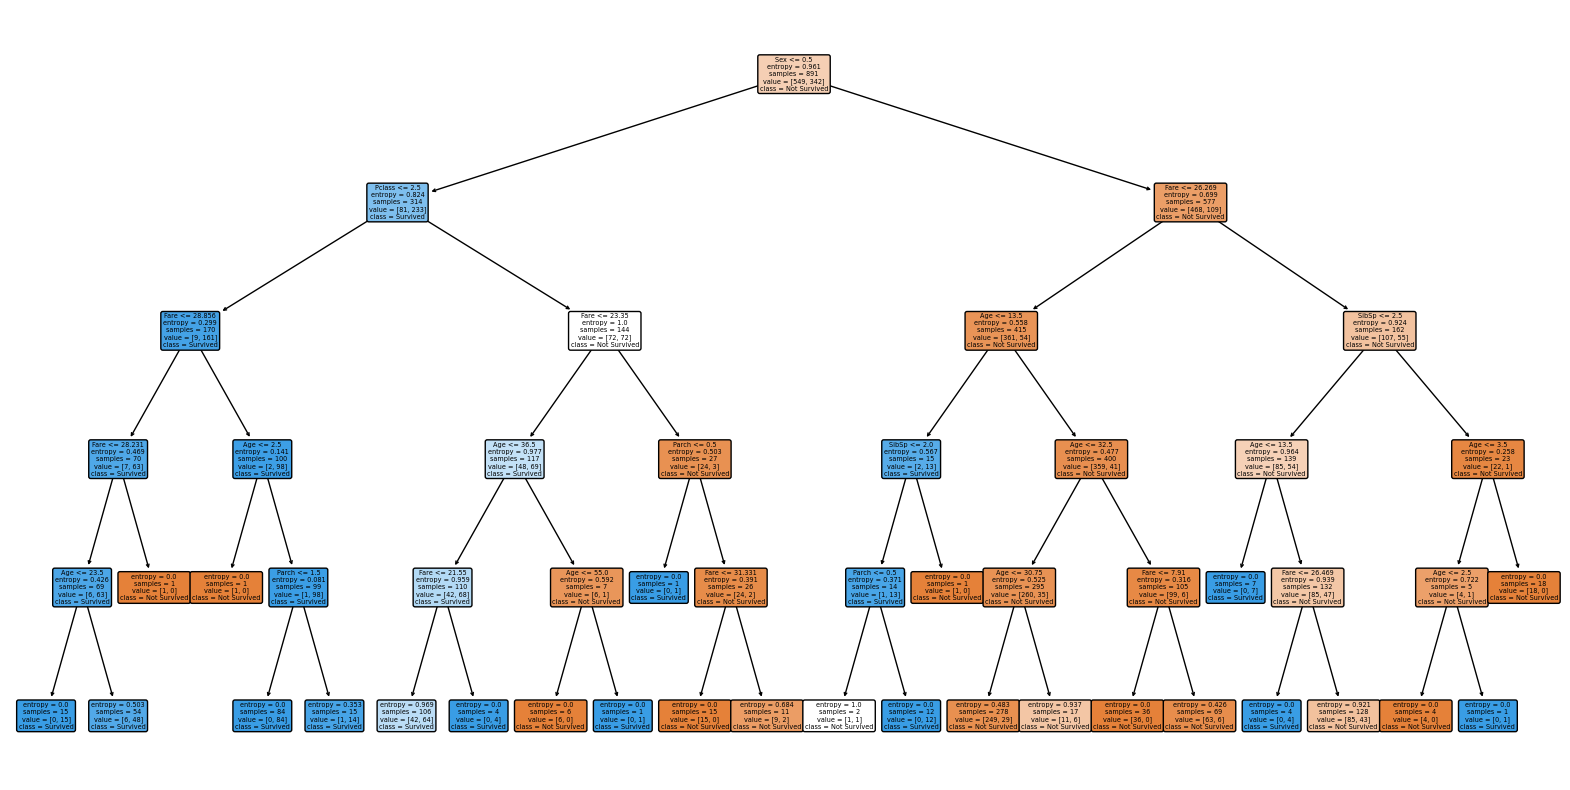

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(sktree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=10)

In [62]:
n = X.shape[0]
split = int(0.8 * n)
trainX = X.iloc[:split]
testX = X.iloc[split:]
trainY = Y.iloc[:split]
testY = Y.iloc[split:]

In [67]:
testX.shape
trainX.shape

(712, 6)

In [68]:
rc.fit(trainX, trainY)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10)

In [69]:
rc.score(trainX, trainY)

0.9213483146067416

In [70]:
rc.score(testX, testY)

0.8268156424581006

# Above score targeting overfitting conditions

In [76]:
from sklearn.model_selection import cross_val_score
acc_list = []
for i in range(1, 50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=5), trainX, trainY).mean()
    acc_list.append(acc)

In [77]:
print(acc_list)

[0.7515512656357728, 0.7823894415443711, 0.7936176499556781, 0.7711809317443119, 0.8090712104796612, 0.8006106569486852, 0.8090712104796612, 0.8034275583571358, 0.7894218457598738, 0.8020486555697823, 0.8146459174628189, 0.7950261006599034, 0.8076726090810598, 0.7894218457598738, 0.8174825174825175, 0.8146754653796908, 0.8104796611838866, 0.8188712695754949, 0.8132571653698415, 0.8189008174923668, 0.8090613611740374, 0.8174431202600217, 0.8104402639613907, 0.8160445188614203, 0.800620506254309, 0.8034078597458878, 0.8146656160740668, 0.8118290160543682, 0.807613513247316, 0.8020585048754063, 0.8174726681768935, 0.807633211858564, 0.8188712695754947, 0.8188712695754949, 0.8090318132571653, 0.8300994779868018, 0.8090515118684133, 0.8146557667684429, 0.8244853737811484, 0.8216881709839458, 0.8118290160543682, 0.8160740667782921, 0.8090416625627892, 0.804875406283857, 0.8146656160740667, 0.8146360681571949, 0.8174529695656456, 0.823076923076923, 0.8132571653698413]


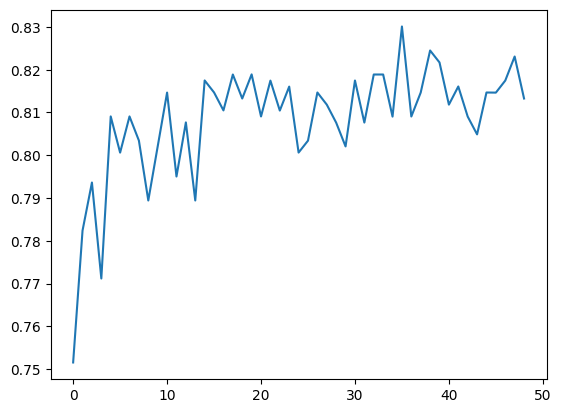

In [78]:
plt.plot(acc_list)

In [79]:
print(np.argmax(acc_list))

35


In [81]:
rc = RandomForestClassifier(n_estimators=35, criterion='entropy', max_depth=5)
rc.fit(trainX, trainY)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=35)

In [82]:
rc.score(trainX, trainY)

0.8539325842696629

In [83]:
rc.score(testX, testY)

0.8603351955307262

# Above it is shown trees are perfectly capped

In [89]:
mn = np.mean(testx['Age'])
testx.fillna(value=mn, inplace=True)

In [91]:
predY = rc.predict(testx)

In [92]:
predY

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,